In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw01.ipynb")

# HW 1A: Plotting and the Permutation Test
## Due Date: Thursday Jan 26, 11:59 PM

You must submit this assignment to Gradescope by the on-time deadline, Thursday, January 26, 11:59pm. Please read the syllabus for the grace period policy. No late
submissions beyond the grace period will be accepted. While course staff is happy to help you if you encounter difficulties with submission, we may not be able to respond to last-minute requests for assistance (TAs need to sleep, after all!). **We strongly encourage you to plan to submit your work to Gradescope several hours before the stated deadline.** This way, you will have ample time to reach out to staff for submission support. 

This is part of a two-part assignment. After completing this part ("Homework 1A"), please read all instructions carefully to combine manually graded questions from Homework 1A with Homework 1B, and submit your work to both the coding and written portals of Gradescope.

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your notebook.

**Collaborators**: *list collaborators here*

## This Assignment

The purpose of this assignment is for you to combine Python, math, and the ideas in Data 8 to draw some interesting conclusions. The methods and results will help build the foundation of Data 100.

## Score Breakdown
Question | Manual? | Points
--- | --- | --
1a | Yes | 1
1b | No | 1
1c | Yes | 2
1d | No | 2
1e | Yes | 1
1f | No | 1
1g | Yes | 1
Total | 4 | 9


## Before You Start

### Autograder and Answer Cells

For each question in the assignment, please write down your answer in the answer cell(s) right below the question. 

We understand that it is helpful to have extra cells breaking down the process towards reaching your final answer. If you happen to create new cells *below* your answer to run code, **NEVER** add cells between a question cell and the answer cell below it. It may cause errors when we run the autograder, and it will cause a failure to generate the PDF file.


**Important note: The local autograder tests will not be comprehensive.** They are meant to give you some useful feedback, but it's your responsibility to ensure your response answers the question correctly. There may be other tests that we run when scoring your notebooks. We **strongly recommend** that you check your solutions yourself rather than just relying on the test cells.

### Initialize your environment

The below cell should run without error if you're using the course DataHub.

In [2]:
import numpy as np
np.random.seed(42)
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Review Jupyter, Python, and NumPy

If you are unfamiliar with Jupyter notebooks, Python, or NumPy, or simply need a refresher, we strongly recommend you check out Lab 01 before getting started.

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Question 1: Distributions ##

Visualizing distributions, both categorical and numerical, helps us understand variability. In Data 8 you visualized numerical distributions by drawing [histograms](https://inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html#histogram)(Chapter 7.2), which look like bar charts but represent proportions by the *areas* of the bars instead of the heights or lengths.


---

### Part 0: Matplotlib Tutorial

We will not be using Data 8's `datascience` library in this course. Instead, we will learn industry- and academia-standard libraries for exploring and visualizing data, including `matplotlib` ([official website](https://matplotlib.org/)).
In this exercise you will use the `hist` function in `matplotlib` instead of the corresponding `Table` method to draw histograms. In a previous cell, we imported the matplotlib library as `plt`, which allows us to call `plt.hist()`.

To start off, suppose we want to plot the probability distribution of the number of spots on a single roll of a die. That should be a flat histogram since the chance of each of the values 1 through 6 is 1/6. Here is a first attempt at drawing the histogram.

(array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

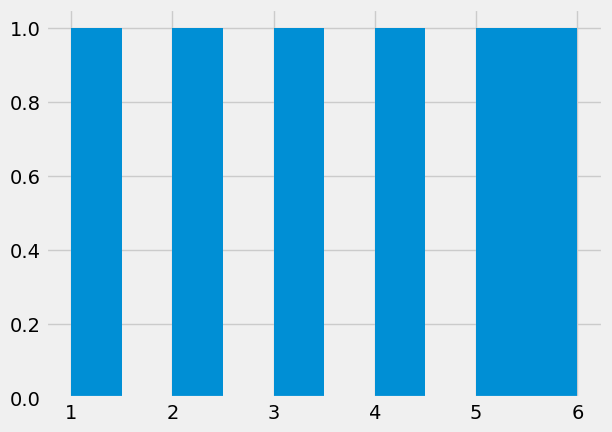

In [3]:
faces = range(1, 7)
plt.hist(faces)

This default plot is not helpful. We have to choose some arguments to get a visualization that we can interpret. 

Note that the second printed line shows the left ends of the default bins, as well as the right end of the last bin. The first line shows the counts in the bins. If you don't want the printed lines, you can add a semi-colon `;` at the end of the call to `plt.hist`, but we'll keep the lines for now.

Let's redraw the histogram with bins of unit length centered at the possible values. By the end of the tutorial you'll see a reason for centering. Notice that the argument for specifying bins is the same as the one for the `Table` method `hist` from the `datascience` library in [Data 8](http://data8.org/).

(array([1., 1., 1., 1., 1., 1.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

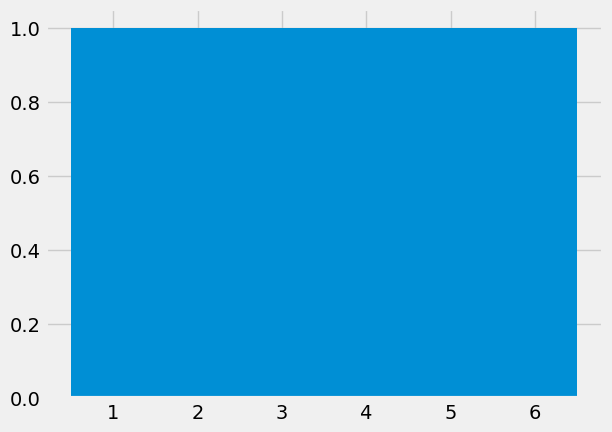

In [4]:
unit_bins = np.arange(0.5, 6.6)
plt.hist(faces, bins=unit_bins)

We need to see the edges of the bars! Let's specify the edge color `ec` to be white. [Here](https://matplotlib.org/3.5.3/gallery/color/named_colors.html) are all the colors you could use, but do try to drag yourself away from the poetic names.

(array([1., 1., 1., 1., 1., 1.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

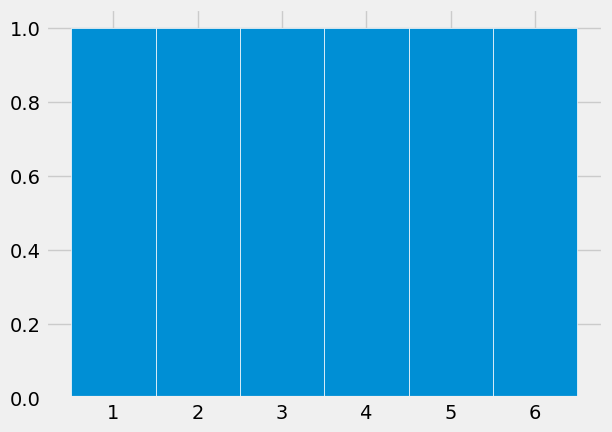

In [5]:
plt.hist(faces, bins=unit_bins, ec='white')

That's much better, but look at the vertical axis. It is not drawn to the [density scale](https://inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html#the-vertical-axis-density-scale) defined in Data 8 (Chapter 7.2). We want a histogram of a probability distribution, so the total area should be 1. We just have to ask for that.

(array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

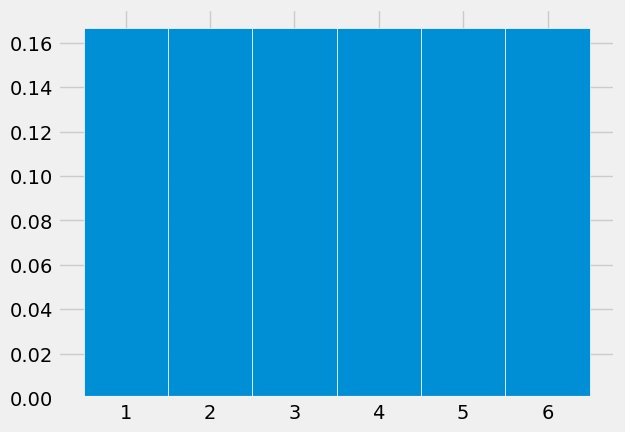

In [6]:
plt.hist(faces, bins=unit_bins, ec='white', density=True)

That's the probability histogram of the number of spots on one roll of a die. The proportion is $1/6$ in each of the bins.


Finally, we can set the opacity, or transparency, of the bars with the *alpha* parameter, which is a value from 0 to 1. For 70% opacity:

(array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

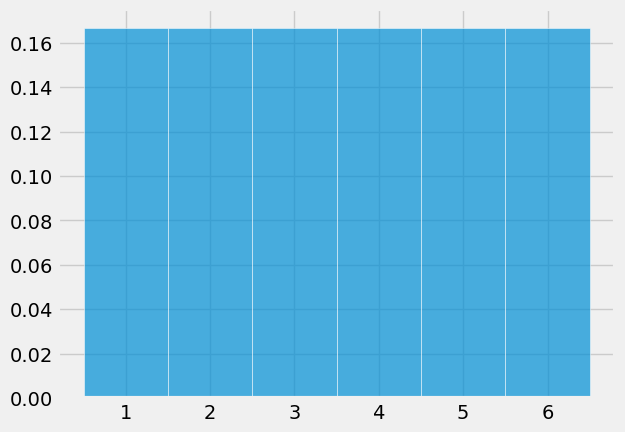

In [7]:
plt.hist(faces, bins=unit_bins, ec='white', density=True, alpha=0.7)

**Note/Reminder**: The above cells printed the counts/proportions and bin boundaries with the visualization. This was intentional on our part to show you how `plt.hist()` returned different values per plot. Going forward, use a semicolon `;` on the last line to suppress additional display as needed.

<!-- BEGIN QUESTION -->

<br/>

---

### Question 1a

Define a function `integer_distribution` that takes an array of integers and draws the histogram of the distribution using unit bins centered at the integers and white edges for the bars. The histogram should be drawn to the density scale, and opacity should be 70\%. The left-most bar should be centered at the smallest integer in the array, and the right-most bar at the largest.

Your function does not have to check that the input is an array consisting only of integers. The display does not need to include the printed proportions and bins. No title or labels are required for this question.

If you have trouble defining the function, go back and carefully read all the lines of code that resulted in the probability histogram of the number of spots on one roll of a die. Pay special attention to the bins. 

**Documentation**: `plt.hist()` [link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)


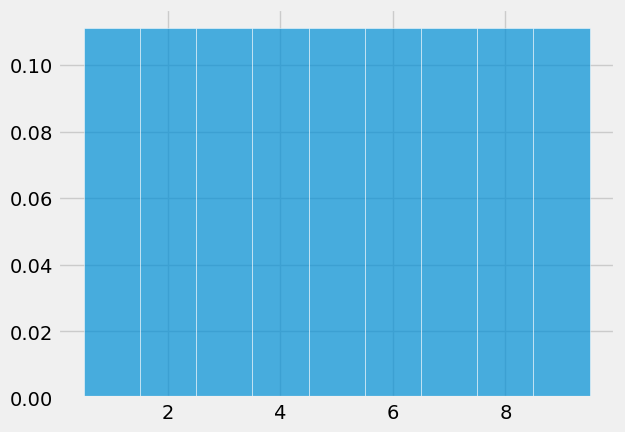

In [18]:
def integer_distribution(arr_ints):
    left = min(arr_ints)
    right = max(arr_ints)
    plt.hist(arr_ints, bins=np.arange(left-0.5, right+0.6), ec='white', density=True, alpha=0.7)
faces = range(1, 10)
integer_distribution(faces)

<!-- END QUESTION -->

<br/>

---

### Tutorial: Birthweights

Recall from Data 8 that you can perform [hypothesis testing using the permutation test](https://inferentialthinking.com/chapters/12/1/AB_Testing.html) (Chapter 12.1). Before continuing, we highly encourage you to read the above linked Data 8 chapters, on which this exercise is directly based.

In a particular medical study, a sample of newborn babies was obtained from a large hospital system.  We will treat the data as if it were a simple random sample, though the sampling was done in multiple stages. Deborah Nolan and Terry Speed discuss the larger dataset in [Stat Labs](https://www.stat.berkeley.edu/~statlabs/).

One of the aims of the study was to see whether maternal smoking was associated with birth weight. **Run the below cell**, which assigns `nonsmoker_births` to a list of birth weights of the babies of the non-smoking mothers (of which there are 715), and `smoker_births` to a list of birth weights of the babies of the smoking mothers (of which ther are 459). 

In [19]:
# Just run this cell.
# You will learn these functions soon!

import pandas as pd
births_df = pd.read_csv("births.csv")

nonsmoker_births = births_df[~births_df['Maternal Smoker']]['Birth Weight'].values
print(len(nonsmoker_births))

smoker_births = births_df[births_df['Maternal Smoker']]['Birth Weight'].values
print(len(smoker_births))

715
459


Suppose that we overlay the distributions of birthweights from the two groups of mothers:

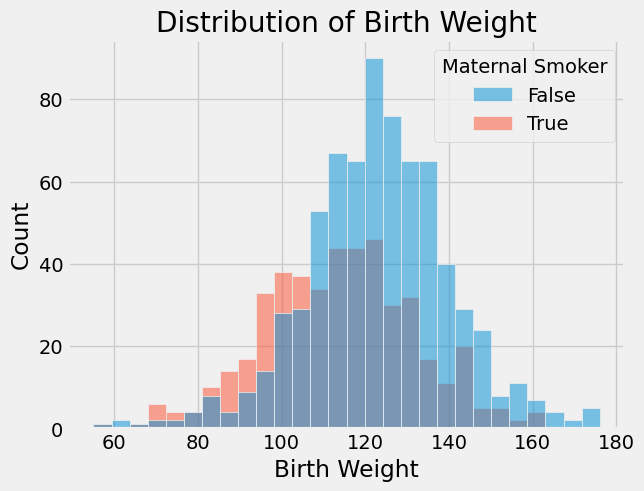

In [20]:
# Just run this cell.
# You will learn these functions soon!

import seaborn as sns
sns.histplot(births_df, x="Birth Weight", hue="Maternal Smoker");
plt.title("Distribution of Birth Weight");

The distribution of the weights of the babies born to mothers who smoked appears to be based slightly to the left of the distribution corresponding to non-smoking mothers. The weights of the babies of the mothers who smoked seem lower on average than the weights of the babies of the non-smokers.

<br/>

Similar to the original study (and the Data 8 chapter), we'd like to study whether this difference reflects just chance variation or perhaps a difference in the distributions in the larger population. Suppose we propose the following two hypotheses:

> **Null hypothesis (H0)**: In the population, the distribution of birth weights of babies is the same for mothers who don’t smoke as for mothers who do. The (observed) difference in the sample is due to chance.

> **Alternative hypothesis (H1)**: In the population, the babies of the mothers who smoke have a <i>**different**</i> birth weight, on average, than the babies of the non-smokers.

We would like to perform hypothesis testing using the permutation test. One way to do so is to compute an observed test statistic and then compare it with multiple simulated test statistics, generated through random permutations.

<br/>

---

### Question 1b

Suppose that we choose a reasonable test statistic as the **absolute** difference between the average birth weights of the two groups (i.e., the babies of non-smokers and the babies of mothers who smoke). **Caution**: This test statistic is slightly different from what is presented in the Data 8 textbook, [Chapter 12.1](https://inferentialthinking.com/chapters/12/1/AB_Testing.html#the-hypotheses).

In the below cell, assign `observed_difference` to the **observed test statistic** given our original sample of `nonsmoker_births` and `smoker_births`.


In [21]:
observed_difference = abs(np.mean(nonsmoker_births)-np.mean(smoker_births))
observed_difference

9.266142572024918

In [22]:
grader.check("q1b")

q1b results: All test cases passed!

<!-- BEGIN QUESTION -->

<br/>

---

### Question 1c

Before we write any code, let’s review the idea of hypothesis testing with the permutation test. We first simulate the experiment many times (say, 10,000 times) through random permutation (i.e. without replacement). Assuming that the null hypothesis holds, this process will produce an empirical distribution of a predetermined test statistic. Then, we use this empirical distribution to compute an empirical p-value, which is then compared against a particular cutoff threshold in order to accept or reject our null hypothesis. 

In the below cell, answer the following questions:
* What does an empirical p-value from a permutation test mean in this particular context of birthweights and maternal smoking habits?
* Suppose the resulting empirical p-value $p \leq 0.01$, where $0.01$ is our p-value cutoff threshold. Do we accept or reject the null hypothesis? Why?


The empirical p-value from a permutation test represents the percentage of test statistics that are less than the observed test statistic. If the p-value is less than the cutoff threshold of 0.01, then we reject the null hypothesis. If the p-value is equal to the cutoff threshold of 0.01, then it's ambiguous. We can either reject or fail to reject because the change is very miniscule.

<!-- END QUESTION -->

<br/>

---

### Question 1d

Now, we begin the permutation test by generating an array called `differences` that contains simulated values of our test statistic from **10,000 permuted samples**. Again, note that our test statistic differs from what is in the Data 8 textbook: we are computing the absolute difference between the mean weight in the smoking group and the mean weight in the non-smoking group, where labels have been assigned at random.

**Reminder**: Data 100 does **not** support the `datascience` library, so you should instead use the appropriate functions from the NumPy library. Some suggested references: Lab 01 (for a quick NumPy tutorial), NumPy array indexing/slicing [documentation](https://numpy.org/doc/stable/user/basics.indexing.html), `np.random.choice` [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html), `np.append` [documentation](https://numpy.org/doc/stable/reference/generated/numpy.append.html).

**Note**: We have provided some optional skeleton code below, but you do not need to follow it. Please assign simulated differences to the array `differences`.

In [23]:
# Create an empty array to hold our simulated differences
differences = np.array([]) 
# Set number of repetitions
repetitions = 10000
# Combine the two arrays into a single array
all_birthweights = np.append(nonsmoker_births, smoker_births)

for i in np.arange(repetitions):
    # Permute all_birthweights
    shuffled_birthweights = np.random.choice(all_birthweights,
                                             size=len(all_birthweights),
                                             replace=False
                                            ) 

    # Make the simulated smoker and non-smoker group
    sim_nonsmoker_births = shuffled_birthweights[:len(nonsmoker_births)]
    sim_smoker_births = shuffled_birthweights[len(nonsmoker_births):]
    
    # Calculate test statistics
    sim_difference = abs(np.mean(sim_nonsmoker_births)-np.mean(sim_smoker_births))
    
    # Save the test statistics in differences
    differences = np.append(differences, sim_difference)

differences

array([0.9669211 , 0.21927571, 0.26007587, ..., 0.4460929 , 0.88822158,
       1.85552966])

In [24]:
grader.check("q1d")

q1d results: All test cases passed!

<!-- BEGIN QUESTION -->

---

### Question 1e

The array `differences` is an empirical distribution of the test statistic simulated under the null hypothesis. This is a prediction about the test statistic, based on the null hypothesis.

Use the `integer_distribution` function you defined in an earlier part to plot a histogram of this empirical distribution. Because you are using this function, your histogram should have unit bins, with bars centered at integers. No title or labels are required for this question.

**Hint**: This part should be very straightforward.


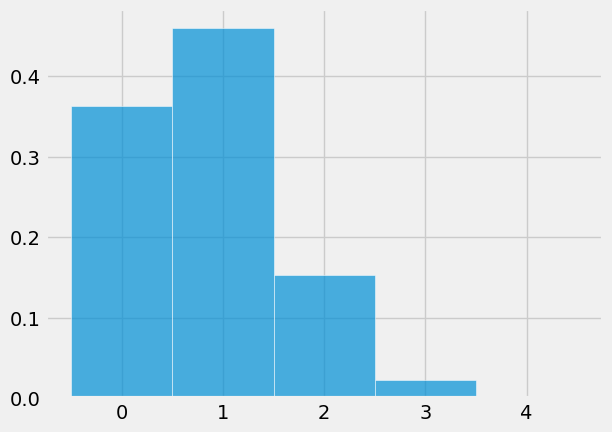

In [25]:
integer_distribution(differences)

<!-- END QUESTION -->

<br/>

---

### Question 1f

Compute `empirical_p`, the empirical p-value based on `differences`, the empirical distribution of the test statistic, and `observed_difference`, the observed value of the test statistic.

Hint: Review the conclusion of the [Data 8 textbook example](https://inferentialthinking.com/chapters/12/1/AB_Testing.html#conclusion-of-the-test) in Chapter 12.1.

In [26]:
empirical_p = np.count_nonzero(differences >= observed_difference) / repetitions
empirical_p

0.0

In [27]:
grader.check("q1f")

q1f results: All test cases passed!

<!-- BEGIN QUESTION -->

<br/>

---

### Question 1g

Based on your computed empirical p-value, do we accept or reject the null hypothesis? Be sure to include a reasonable p-value cutoff threshold, if any.


Since the empirical p-value is 0, no matter what the cutoff threshold is, the p-value will always be less. Therefore we can reasonably reject the null hypothesis.

<!-- END QUESTION -->

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Homework 1A!

### Submission Instructions

Below, you will see two cells.
* Running the first cell will automatically generate a PDF of your answers to all questions that need to be manually graded.
* Running the second cell will automatically generate a zip with your autograded answers.

**You are responsible for combining this resulting Homework 1A PDF with your answers to Homework 1B**, then submitting **both** the coding and written portions of Homework 1 to their respective Gradescope portals:
* **Homework 01 Coding**: Submit your Jupyter notebook zip file for Homework 1A,
which can be generated and downloaded from DataHub by using the `grader.export()`
cell provided below.
* **Homework 01 Written**: Submit a single PDF to Gradescope that contains both
(1) your answers to all manually graded questions from this Homework 1A Jupyter
Notebook, and (2) your answers to all questions in Homework 1B.

To receive credit on this assignment, **you must submit both your coding and written
portions to their respective Gradescope portals.** Your written submission (a single
PDF) can be generated as follows:

1. Access your answers to manually graded Homework 1A  questions in one of three ways:
      * <b>*Automatically create PDF (recommended)*</b>: Run the first cell below and download the generated PDF. This function will extract your response to the manually graded questions and put them on separate page. This process may fail if your answer is not properly formatted; if this is the case, check out common errors and solution described on Ed or follow either of the two ways described below.
      * *Manually download PDF*: If there are issues with automatically generating the PDF in the first cell, you can try downloading the notebook as a PDF by clicking on `File -> Save and Export Notebook As... -> PDF`. If you choose to go this route, you must take special care to ensure all appropriate pages are chosen for each question on Gradescope.
      * *Take screenshots*: If that doesn't work either, you can take screenshots of your answers (and your code if present) to manually graded questions and include them as images in a PDF. The manually graded questions are listed at the top of the Homework 1A notebook.
    
1. Answer the Homework 1B written questions.

1. Combine these two sets of answers together into the same PDF, and submit to the appropriate Gradescope written portal. You can use PDF merging tools, e.g., [Adobe Reader](https://get.adobe.com/reader/), [Smallpdf](https://smallpdf.com/merge-pdf) or [Apple Preview](https://support.apple.com/en-us/HT202945).

1. **Important**: When submitting on Gradescope, you **must tag pages to each question correctly** (it prompts you to do this after submitting your work). This significantly streamlines the grading process for our readers. Failure to do this may result in a score of 0 for untagged questions.

**You are responsible for ensuring your submission follows our requirements. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with submission, please don't hesitate to reach out to staff prior to the deadline.

In [28]:
from otter.export import export_notebook
from os import path
from IPython.display import display, HTML
export_notebook("hw01.ipynb", filtering=True, pagebreaks=True)
if(path.exists('hw01.pdf')):
    display(HTML("Download your PDF <a href='hw01.pdf' download>here</a>."))
else:
    print("\n Pdf generation fails, please try the other methods described above")

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [55]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...

Your submission received the following results when run against available test cases:

    q1b results: All test cases passed!

    q1d results: All test cases passed!

    q1f results: All test cases passed!
